# Sprint 深層学習スクラッチ ディープニューラルネットワーク

## 1.このSprintについて

> **Sprintの目的**

- スクラッチを通してニューラルネットワークの発展的内容を理解する

> **どのように学ぶか**

スクラッチで作成したニューラルネットワークの実装を拡張していきます。

## 2.ディープニューラルネットワークスクラッチ

前回は3層のニューラルネットワークを作成しましたが、今回はこれを任意の層数に拡張しやすいものに書き換えていきます。その上で、活性化関数や初期値、最適化手法について発展的なものを扱えるようにしていきます。


このようなスクラッチを行うことで、今後各種フレームワークを利用していくにあたり、内部の動きが想像できることを目指します。


名前は新しくScratchDeepNeuralNetrowkClassifierクラスとしてください。

> **層などのクラス化**

クラスにまとめて行くことで、構成を変更しやすい実装にしていきます。


**手を加える箇所**


- 層の数
- 層の種類（今後畳み込み層など他のタイプの層が登場する）
- 活性化関数の種類
- 重みやバイアスの初期化方法
- 最適化手法

そのために、全結合層、各種活性化関数、重みやバイアスの初期化、最適化手法それぞれのクラスを作成します。

## 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。

また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。


初期化方法と最適化手法のクラスについては後述します。


**《雛形》**

In [1]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        pass
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        pass
        return A
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        pass
        # 更新
        self = self.optimizer.update(self)
        return dZ

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder

In [3]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X        
        A = X@self.W + self.B # 線形変換
        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 前sprint問題4公式通り
        self.dB = np.sum(dA, axis=0)
        self.dW = self.X.T@dA
        dZ = dA@self.W.T

        # 更新
        self = self.optimizer.update(self)
        
        return dZ

## 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。


これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

In [4]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W : shape(n_nodes1, n_nodes2)
        """
        W = np.random.normal(0, self.sigma, (n_nodes1, n_nodes2)) 
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : shape(n_nodes2, )
        """
        B = np.random.normal(0, self.sigma, n_nodes2) 
        return B

## 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

In [5]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        # 前sprint問題4公式通り
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return

## 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。


> 発展的要素

活性化関数や重みの初期値、最適化手法に関してこれまで見てきた以外のものを実装していきます。

In [6]:
class Sigmoid:
    """
    活性化関数 : 　シグモイド関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        # 前sprint問題2公式通り
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        # 前sprint問題4公式通り
        dA = dZ * (1 - self.Z) * self.Z
        return dA

In [7]:
class Tanh:
    """
    活性化関数 : 　ハイパボリックタンジェント関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        self.Z = np.tanh(A)
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        # 前sprint問題4公式通り(tanh関数の微分)
        dA = dZ * (1 - self.Z ** 2) 
        return dA

In [8]:
class Softmax:
    """
    活性化関数 : 　ソフトマックス関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        c = np.max(A) # オーバーフロー対策
        self.Z = np.exp(A - c) / np.sum(np.exp(A - c), axis=1).reshape(-1,1)
        return self.Z

    def backward(self, Y):
        """
        バックプロパゲーションのときの処理
        """
        dA = self.Z - Y
        return dA

    def loss_func(self, Z, Y):
        """
        損失関数（目的関数）:交差エントロピー誤差
        """
        loss = -(Y * np.log(Z)).mean(axis=0).sum()
        return loss

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。

実装上はnp.maximumを使い配列に対してまとめて計算が可能です。


[numpy.maximum — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.maximum.html)

In [9]:
class ReLU:
    """
    活性化関数 : 　ReLU関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        self.A = A
        self.Z = np.maximum(A, 0)
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        dA = np.where(self.Z > 0, 1*dZ, 0)
        return dA

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは **Xavierの初期値** （またはGlorotの初期値）、ReLUのときは **Heの初期値** が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。

In [10]:
class XavierInitializer():
    """
    重みとバイアスの初期値 : シグモイド関数やハイパボリックタンジェント関数のとき
    """
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W : shape(n_nodes1, n_nodes2)
        """
        self.sigma = 1 / np.sqrt(n_nodes1) # Xavierの初期値における標準偏差
        W = np.random.normal(0, self.sigma, (n_nodes1, n_nodes2)) 
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : shape(n_nodes2, )
        """
        B = np.random.normal(0, self.sigma, n_nodes2) 
        return B

In [11]:
class HeInitializer():
    """
    重みとバイアスの初期値 : ReLU関数のとき
    """
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W : shape(n_nodes1, n_nodes2)
        """
        self.sigma = np.sqrt(2 / n_nodes1) # Heの初期値における標準偏差
        W = np.random.normal(0, self.sigma, (n_nodes1, n_nodes2)) 
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : shape(n_nodes2, )
        """
        B = np.random.normal(0, self.sigma, n_nodes2) 
        return B

## 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。

In [12]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.HW = 0
        self.HB = 0
    
    def update(self, layer):
        self.HW += layer.dW ** 2
        self.HB += layer.dB ** 2
        layer.W -= self.lr * np.sqrt(1 / (self.HW + 1e-7)) * layer.dW # 1e-7加算は０除算防止のため
        layer.B -= self.lr * np.sqrt(1 / (self.HB + 1e-7)) * layer.dB # 1e-7加算は０除算のため

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。

In [13]:
class ScratchDeepNeuralNetrowkClassifier():
    """
    ディープニューラルネットワーク分類器
    ----------
    lr : 学習率
    batch_size : バッチサイズ   
    n_epoch : エポック数
    verbose : Trueの場合、学習曲線をプロット
    ----------
    """
    n_features, n_nodes1, n_nodes2, n_output = 784, 400, 200, 10
    
    def __init__(self, batch_size=20, n_epoch=10, lr=0.01, Activater=ReLU, Optimizer=AdaGrad, verbose=True):
        self.verbose = verbose 
        self.batch_size = batch_size
        self.entropys = []
        self.val_entropys = []
        self.n_epoch = n_epoch
        self.lr = lr  # 学習率

        # 使う活性化関数によって重みやバイアスの初期値の分岐
        self.Activater = Activater
        if Activater == Sigmoid or Activater == Tanh:
            self.Initializer = XavierInitializer
        else:
            self.Initializer = HeInitializer

        # 最適化手法の選択
        self.Optimizer = Optimizer


    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # DIVER《サンプルコード1》の改造
        # Optimizer=AdaGradを想定し、FC毎にインスタンス化
        # optimizer = SGD(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.Initializer(), self.Optimizer(self.lr))
        self.activation1 = self.Activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.Initializer(), self.Optimizer(self.lr))
        self.activation2 = self.Activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.Initializer(), self.Optimizer(self.lr))
        self.activation3 = Softmax()

        self.entropys = []  # 誤差を入れるリストを用意

        # yをone-hot表現に変換
        onehot_y = (y.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)

        # バッチに分割
        get_mini_batch = GetMiniBatch(X, onehot_y, batch_size=self.batch_size) 

        # 検証用データが存在する場合
        if X_val is not None:
            # y_valをone-hot表現に変換
            onehot_y_val = (y_val.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)
            # 交差エントロピー誤差を入れるリストを作っておく
            self.val_entropys = []

        # 学習開始(エポック数分繰り返す)
        for epoch in range(self.n_epoch):

            # ミニバッチの個数分ループ
            for mini_X_train, mini_y_train in get_mini_batch:

                # フォワードプロパゲーション
                self.forward(mini_X_train)

                # バックプロパゲーション
                dA3 = self.activation3.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                
            # エントロピーを計算するためXを予測
            Z3 = self.forward(X)
            # 1サンプル毎の平均誤差をリストに格納
            self.entropys.append(self.activation3.loss_func(Z3, onehot_y)) 

            # 検証用データが存在する場合
            if X_val is not None:
                Z3_val = self.forward(X_val)
                self.val_entropys.append(
                    self.activation3.loss_func(Z3_val, onehot_y_val))

    def forward(self, X):
        """
        フォワードプロパゲーションの実装
        """
        # 《サンプルコード2》
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [14]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## 3.検証

##【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

In [15]:
# MNISTのデータセットを読み込み
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [17]:
# 分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


**scratch_dnn1(n_epoch=10, lr=0.01, Activater=ReLU, Optimizer=AdaGrad)**

In [18]:
scratch_dnn1 = ScratchDeepNeuralNetrowkClassifier() # インスタンス生成
scratch_dnn1.fit(X_train, y_train, X_val, y_val) # 学習
y_pred = scratch_dnn1.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred))

Accuracy_score :  0.9785833333333334


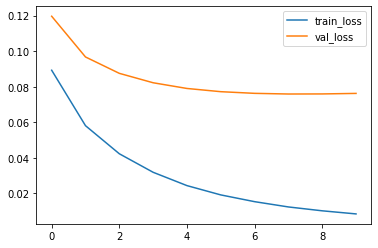

In [19]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn1.entropys, label='train_loss')
plt.plot(scratch_dnn1.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn2(n_epoch=10, lr=0.01, Activater=Tanh, Optimizer=AdaGrad)**

In [20]:
scratch_dnn2 = ScratchDeepNeuralNetrowkClassifier(Activater=Tanh) # インスタンス生成
scratch_dnn2.fit(X_train, y_train, X_val, y_val) # 学習
y_pred2 = scratch_dnn2.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred2))

Accuracy_score :  0.9723333333333334


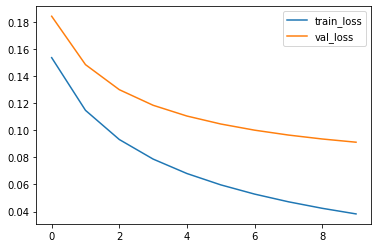

In [21]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn2.entropys, label='train_loss')
plt.plot(scratch_dnn2.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn3(n_epoch=10, lr=0.01, Activater=Sigmoid, Optimizer=AdaGrad)**

In [22]:
scratch_dnn3 = ScratchDeepNeuralNetrowkClassifier(Activater=Sigmoid) # インスタンス生成
scratch_dnn3.fit(X_train, y_train, X_val, y_val) # 学習
y_pred3 = scratch_dnn3.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred3))

Accuracy_score :  0.96


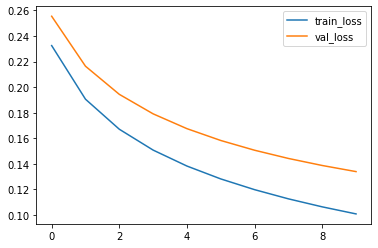

In [23]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn3.entropys, label='train_loss')
plt.plot(scratch_dnn3.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn4(n_epoch=10, lr=0.01, Activater=ReLU, Optimizer=SGD)**

In [24]:
scratch_dnn4 = ScratchDeepNeuralNetrowkClassifier(Optimizer=SGD) # インスタンス生成
scratch_dnn4.fit(X_train, y_train, X_val, y_val) # 学習
y_pred4 = scratch_dnn4.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred4))

Accuracy_score :  0.9784166666666667


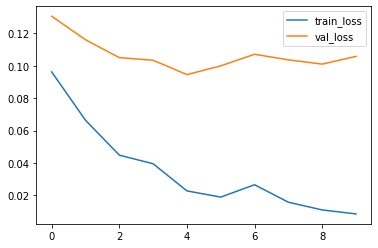

In [25]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn4.entropys, label='train_loss')
plt.plot(scratch_dnn4.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn5(n_epoch=10, lr=0.001, Activater=ReLU, Optimizer=AdaGrad)**

In [26]:
scratch_dnn5 = ScratchDeepNeuralNetrowkClassifier(lr=0.001) # インスタンス生成
scratch_dnn5.fit(X_train, y_train, X_val, y_val) # 学習
y_pred5 = scratch_dnn5.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred5))

Accuracy_score :  0.9480833333333333


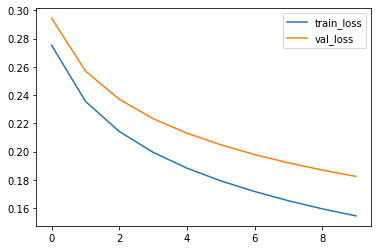

In [27]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn5.entropys, label='train_loss')
plt.plot(scratch_dnn5.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn6(n_epoch=10, lr=0.001, Activater=ReLU, Optimizer=SGD)**

In [28]:
scratch_dnn6 = ScratchDeepNeuralNetrowkClassifier(lr=0.001, Optimizer=SGD) # インスタンス生成
scratch_dnn6.fit(X_train, y_train, X_val, y_val) # 学習
y_pred6 = scratch_dnn6.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred6))

Accuracy_score :  0.9725


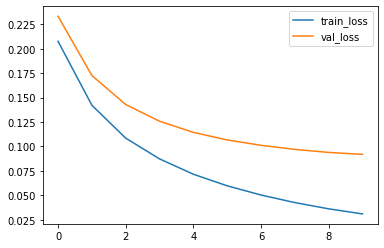

In [29]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn6.entropys, label='train_loss')
plt.plot(scratch_dnn6.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn7(n_epoch=10, lr=0.001, Activater=Tanh, Optimizer=AdaGrad)**

In [30]:
scratch_dnn7 = ScratchDeepNeuralNetrowkClassifier(lr=0.001, Activater=Tanh) # インスタンス生成
scratch_dnn7.fit(X_train, y_train, X_val, y_val) # 学習
y_pred7 = scratch_dnn7.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred7))

Accuracy_score :  0.9261666666666667


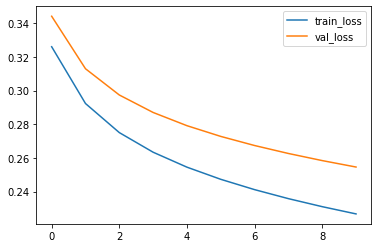

In [31]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn7.entropys, label='train_loss')
plt.plot(scratch_dnn7.val_entropys,label='val_loss')
plt.legend()
plt.show()

**scratch_dnn8(n_epoch=20, lr=0.001, Activater=ReLU, Optimizer=AdaGrad)**

In [32]:
scratch_dnn8 = ScratchDeepNeuralNetrowkClassifier(n_epoch=20) # インスタンス生成
scratch_dnn8.fit(X_train, y_train, X_val, y_val) # 学習
y_pred8 = scratch_dnn1.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred8))

Accuracy_score :  0.9785833333333334


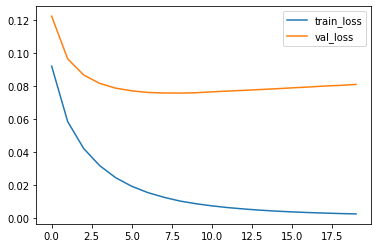

In [33]:
import matplotlib.pyplot as plt
plt.plot(scratch_dnn8.entropys, label='train_loss')
plt.plot(scratch_dnn8.val_entropys,label='val_loss')
plt.legend()
plt.show()

**考察：scratch_dnn1(n_epoch=10, lr=0.01, Activater=ReLU, Optimizer=AdaGrad)とscratch_dnn8(n_epoch=20, lr=0.001, Activater=ReLU, Optimizer=AdaGrad)が同じく、一番高い正解率(0.9785833333333334)でした。**